In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [16]:
df_email = pd.read_csv('email_classification_dataset[1].csv')
df_email.head()

,id,email,label
0,2685,From: support@legitcompany.com\nSubject: Regar...,ham
1,5857,From: noreply@softwareupdates.com\nSubject: We...,ham
2,2399,From: noreply@softwareupdates.com\nSubject: Im...,ham
3,3244,From: info@customerservice.co\nSubject: Team S...,ham
4,2844,From: info@customerservice.co\nSubject: Team S...,ham


In [17]:
df_email = df_email[['email', 'label']]  # Keep only relevant columns
df_email['label'] = df_email['label'].map({'ham': 0, 'spam': 1})  # Encode labels


/tmp/ipython-input-729593990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_email['label'] = df_email['label'].map({'ham': 0, 'spam': 1})  # Encode labels


In [18]:
X = df_email['email']
y = df_email['label']


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [21]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


LogisticRegression()

In [22]:
y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Ham', 'Spam'])
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

         Ham       1.00      1.00      1.00      1682
        Spam       1.00      1.00      1.00       318

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
 [[1682    0]
 [   0  318]]


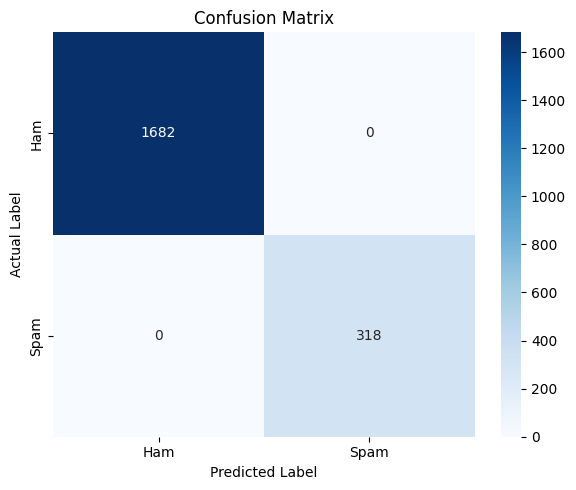

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you already have y_test and y_pred
cm = confusion_matrix(y_test, y_pred)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

# Call the function
plot_confusion_matrix(cm, classes=['Ham', 'Spam'])
